In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [83]:
orders = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [84]:
orders.shape[0]

4622

#### 2. Вывести названия столбцов

In [85]:
print(*orders.columns)

order_id quantity item_name choice_description item_price


#### 3. Определить самую частую позицию (item) в заказе 

In [86]:
orders.item_name.mode()[0]

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

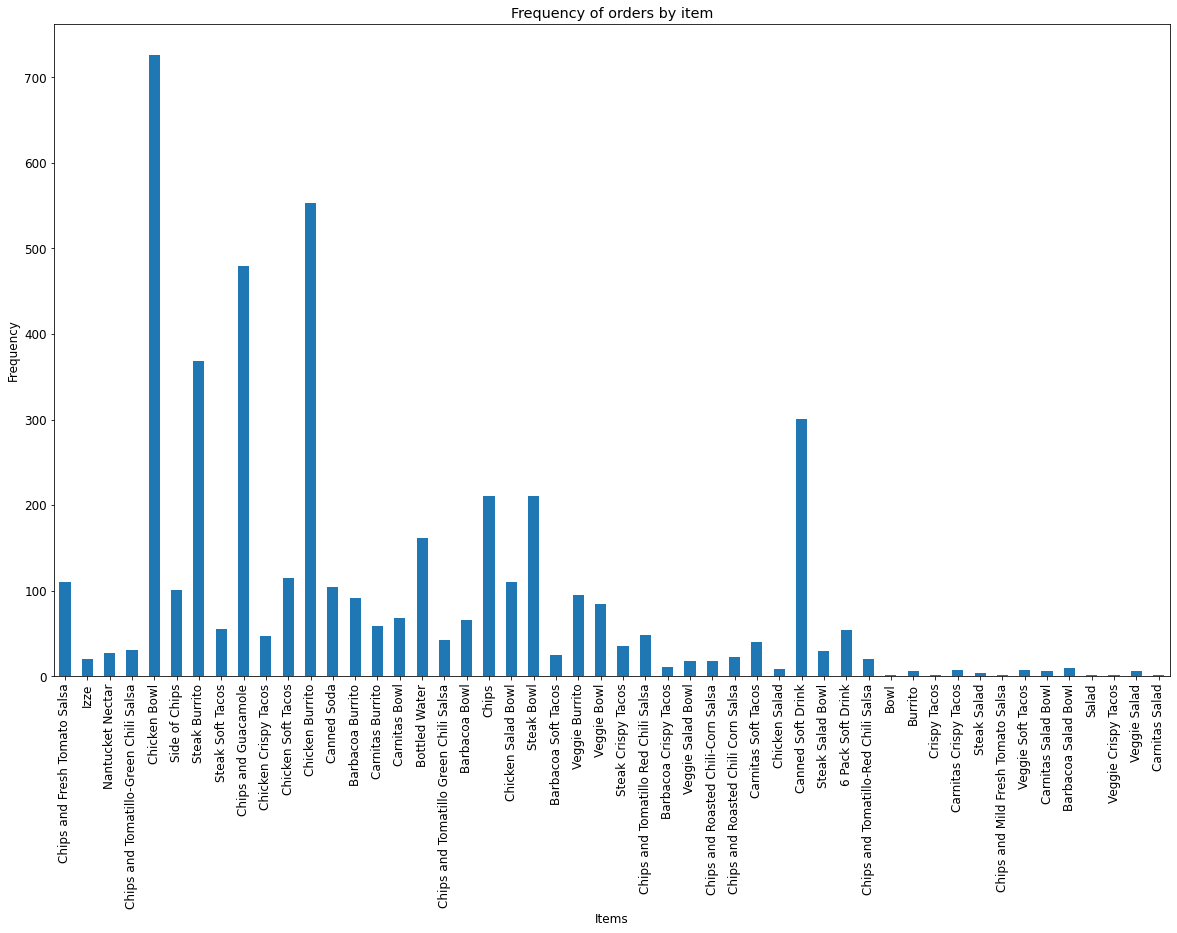

In [87]:
group = orders.groupby('item_name', sort = False).order_id.count().reset_index()
ax = group.plot(x ='item_name', y = 'order_id', kind = 'bar', legend = False, figsize = (20, 12))
ax.set(xlabel = 'Items', ylabel = 'Frequency')
plt.title('Frequency of orders by item')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [88]:
orders.item_price = orders.item_price.apply(lambda row: float(row[1:]))
orders.item_price.dtype

dtype('float64')

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

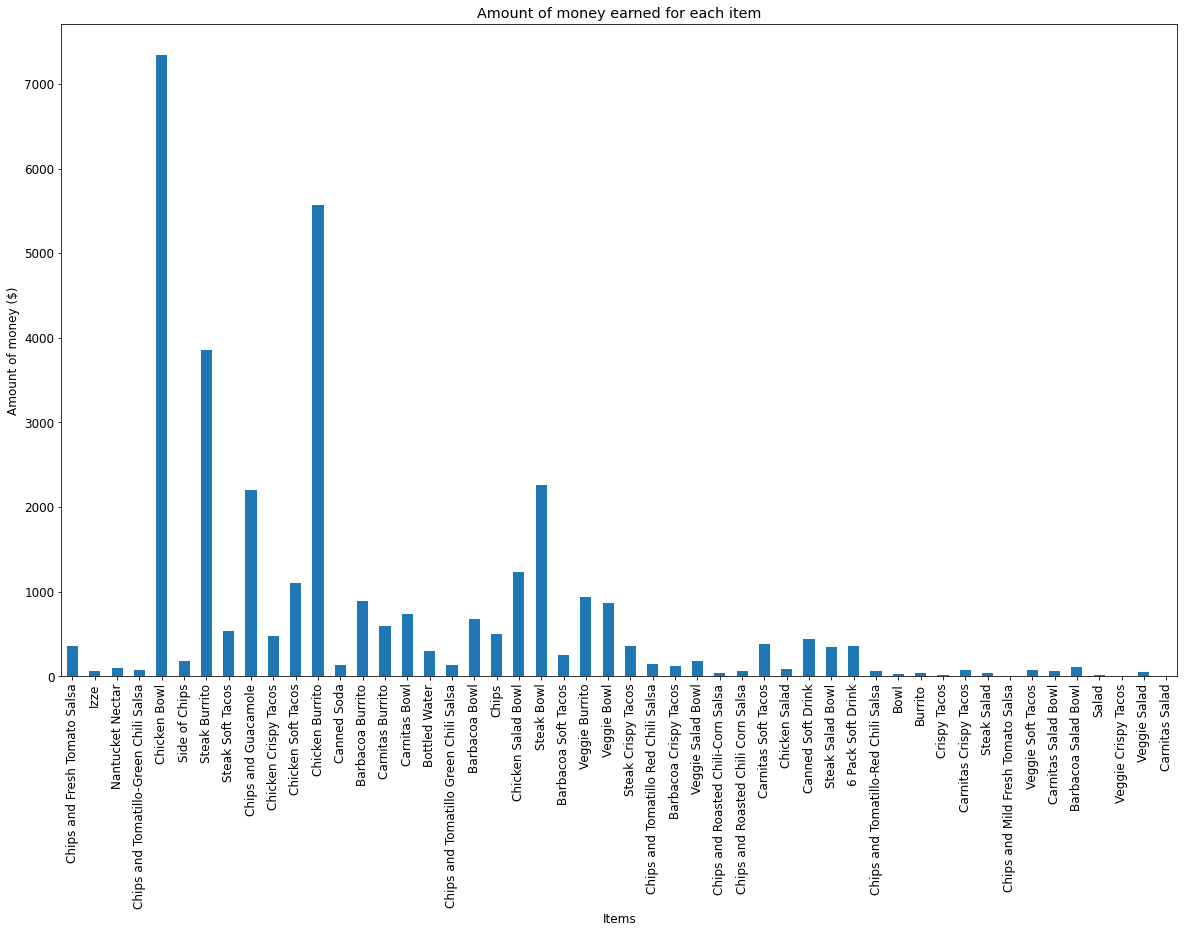

In [89]:
group = orders.groupby('item_name', sort = False).item_price.sum()
ax = group.plot(y = 'item_price', kind = 'bar', legend = False, figsize = (20, 12))
ax.set(xlabel = 'Items', ylabel = 'Amount of money ($)')
plt.title('Amount of money earned for each item')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [90]:
#first way
avg1 = orders.groupby('order_id', sort = False).item_price.sum().mean()
#second way
avg2 = orders.item_price.sum() / orders.order_id.nunique()
print('$', round(avg1, 2), '\n$', round(avg2, 2))

$ 18.81 
$ 18.81


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [91]:
group = orders.groupby('order_id', sort = False).item_name.nunique().reset_index()
group.agg({'item_name': ['mean', 'min', 'max', 'median']})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки

#### Статистика заказов стейков

In [92]:
steaks = orders.loc[orders.item_name.str.contains('Steak')]
steaks.groupby('item_name')[['quantity', 'item_price']].describe()

quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.711801  2.672417  8.69  9.250   9.25  11.75   
Steak Burrito           368.0  10.465842  2.571981  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0  10.209714  1.827732  8.69  9.120   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.847931  3.511170  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.746364  1.523743  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          26.07  
Steak Burrito       27.75  
Steak Crispy Tacos  17.98  
Steak Salad          8.99  
Steak Salad Bowl    23.78  
Steak Soft Tacos    18.50

#### Статистика заказов по остроте соуса

In [93]:
sharpness = orders[orders.choice_description.str.contains('Mild|Medium|Hot', na = False)]
sharpness.groupby('item_name')[['quantity', 'item_price']].describe()

quantity                                               \
                         count      mean       std  min  25%  50%  75%  max   
item_name                                                                     
Barbacoa Bowl             16.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Barbacoa Burrito          22.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Barbacoa Crispy Tacos      3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Barbacoa Soft Tacos        3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Carnitas Bowl             24.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Carnitas Burrito          14.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Carnitas Crispy Tacos      3.0  1.333333  0.577350  1.0  1.0  1.0  1.5  2.0   
Carnitas Salad             1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0   
Carnitas Soft Tacos        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Chicken Bowl             168.0  1.113095  0.335978  1.0  1.0  1.0  1.0  3.0   
Chicken Burrito          160.0  1.031250  0.174539  1.0  1.0  1.0  1.0  2.0   
Chicken Crispy Tacos      10.0  1.100000  0.316228  1.0  1.0  1.0  1.0  2.0   
Chicken Salad              9.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Chicken Soft Tacos        33.0  1.090909  0.291937  1.0  1.0  1.0  1.0  2.0   
Steak Bowl                61.0  1.049180  0.284384  1.0  1.0  1.0  1.0  3.0   
Steak Burrito            146.0  1.047945  0.214386  1.0  1.0  1.0  1.0  2.0   
Steak Crispy Tacos        10.0  1.100000  0.316228  1.0  1.0  1.0  1.0  2.0   
Steak Salad                3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Soft Tacos          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Veggie Bowl               20.0  1.100000  0.307794  1.0  1.0  1.0  1.0  2.0   
Veggie Burrito            44.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Veggie Crispy Tacos        1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0   
Veggie Salad               6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Veggie Soft Tacos          3.0  1.333333  0.577350  1.0  1.0  1.0  1.5  2.0   

                      item_price                                         \
                           count       mean       std   min   25%   50%   
item_name                                                                 
Barbacoa Bowl               16.0   9.886250  1.278759  8.69  8.99  8.99   
Barbacoa Burrito            22.0   9.184545  0.684020  8.69  8.99  8.99   
Barbacoa Crispy Tacos        3.0   9.820000  1.437602  8.99  8.99  8.99   
Barbacoa Soft Tacos          3.0   9.820000  1.437602  8.99  8.99  8.99   
Carnitas Bowl               24.0   9.977500  1.199660  8.99  8.99  8.99   
Carnitas Burrito            14.0   9.452143  1.036200  8.69  8.99  8.99   
Carnitas Crispy Tacos        3.0  11.986667  5.190379  8.99  8.99  8.99   
Carnitas Salad               1.0   8.990000       NaN  8.99  8.99  8.99   
Carnitas Soft Tacos          6.0   8.990000  0.000000  8.99  8.99  8.99   
Chicken Bowl               168.0  10.331726  3.698101  8.19  8.49  8.49   
Chicken Burrito            160.0   9.529625  2.084259  8.19  8.49  8.49   
Chicken Crispy Tacos        10.0   9.588000  2.712608  8.49  8.49  8.49   
Chicken Salad                9.0   9.010000  1.121194  8.19  8.49  8.49   
Chicken Soft Tacos          33.0   9.639091  3.065065  8.49  8.49  8.49   
Steak Bowl                  61.0   9.884262  2.564767  8.69  8.99  8.99   
Steak Burrito              146.0   9.888219  2.470534  8.69  8.99  8.99   
Steak Crispy Tacos          10.0   9.859000  2.854986  8.69  8.99  8.99   
Steak Salad                  3.0   8.990000  0.000000  8.99  8.99  8.99   
Steak Soft Tacos            17.0   9.429412  0.978452  8.99  8.99  8.99   
Veggie Bowl                 20.0   9.837000  2.642491  8.49  8.49  8.49   
Veggie Burrito              44.0   8.716364  0.724100  8.49  8.49  8.49   
Veggie Crispy Tacos          1.0   8.490000       NaN  8.49  8.49  8.49   
Veggie Salad 

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [94]:
orders['rub_price'] = round(orders.item_price * 72.59, 2)
orders

,order_id,quantity,item_name,choice_description,item_price,rub_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.49
1,1,1,Izze,[Clementine],3.39,246.08
2,1,1,Nantucket Nectar,[Apple],3.39,246.08
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.49
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1232.58
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,852.93
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,852.93
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,816.64
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,635.16


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках

Сгруппировать заказы по входящим позициям в него

In [95]:
group1 = orders.groupby('order_id', sort = False).agg({'item_name': lambda orders: ", ".join(orders), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
group1

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...,...
1829,1830,"Steak Burrito, Veggie Burrito",23.00,2
1830,1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1831,1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2
1832,1833,"Steak Burrito, Steak Burrito",23.50,2


Отдельно сгруппировать по стейкам во всех видах прожарках

In [96]:
group2 = steaks.groupby('order_id', sort = False).agg({'item_name': lambda orders: ", ".join(orders), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
group2

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
607,1810,Steak Crispy Tacos,11.75,1
608,1818,Steak Salad Bowl,9.39,1
609,1829,Steak Burrito,11.75,1
610,1830,Steak Burrito,11.75,1


#### 12. Определить цену по каждой позиции в отдельности

In [97]:
сontains_and = orders.item_name.str.contains('and')
orders.loc[сontains_and, ('price_for_one_item')] = round((orders['item_price'] - 2.15) / orders['quantity'], 2)
orders.loc[~сontains_and, ('price_for_one_item')] = round(orders['item_price'] / orders['quantity'], 2)
orders.loc[сontains_and, ('item_name')] = orders[сontains_and]['item_name'].apply(lambda row: row[10:])

prices_for_item = orders.groupby('item_name').price_for_one_item.agg('unique').reset_index()
prices_for_item['mean_price'] = prices_for_item['price_for_one_item'].apply(lambda row: round(np.mean(list(row)), 2))
prices_for_item[~prices_for_item.item_name.str.contains('and')]

,item_name,price_for_one_item,mean_price
0,6 Pack Soft Drink,[6.49],6.49
1,Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]",10.28
2,Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]",10.21
3,Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]",10.37
4,Barbacoa Salad Bowl,"[11.89, 9.39]",10.64
5,Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]",10.37
6,Bottled Water,"[1.09, 1.5]",1.30
7,Bowl,[7.4],7.40
8,Burrito,[7.4],7.40
9,Canned Soda,[1.09],1.09


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.